## This notebook serves for creating simple plots from generated data

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
# load data from csv and concat them
def loadDF(algoName, folderName, nList):  
    fileNameTemplate = './Output/{0}_{1}_{2}.csv'

    df = None
    for n in nList:
        if df is None:
            df = pd.read_csv(fileNameTemplate.format(folderName, algoName, n))
        else:
            df = pd.concat([df, pd.read_csv(fileNameTemplate.format(folderName, algoName, n))], ignore_index=True)
    
    # make all ids positive
    df['KnapsackId'] = abs(df['KnapsackId'])
    return df

In [3]:
# load results.csv
res = pd.read_csv('results.csv')
for index, row in res.iterrows():
    if row['FileName'][0] == 'Z':
        res.loc[index, 'n'] = row['FileName'][3:]
        res.loc[index, 'folder'] = row['FileName'][:3]
    else:
        res.loc[index, 'n'] = row['FileName'][2:]
        res.loc[index, 'folder'] = row['FileName'][:2]

display(res.head(2))
display(res.tail(2))

,FileName,AlgoName,CpuTime,Date,n,folder
0,NK27,BruteForce,1372.25000,2020-10-25,27,NK
1,NK4,BruteForce,0.28125,2020-10-25,4,NK


,FileName,AlgoName,CpuTime,Date,n,folder
240,ZKW15,FPTAS_E0.2,0.171875,2020-10-31,15,ZKW
241,ZKW25,FPTAS_E0.2,0.062500,2020-10-31,25,ZKW


In [4]:
# definice pouzitelnych promennych
NK = 'NK'
ZKC = 'ZKC'
ZKW = 'ZKW'
bruteForce = 'BruteForce'
bnb = 'BranchAndBound'
greedy = 'Greedy'
greedyRedux = 'GreedyRedux'
dp = 'DP_PD'
epsilon = 0.01 # or 0.05, 0.1, 0.2
fptas = 'FPTAS_E' + str(epsilon)

In [5]:
# ziskani pozadovanych dat
# + lze omezit/rozsirit nacitane nka
# vyber zpracovavanou slozku
nList = [4,10,15,20,22,25,27,30]#,32]#,35,37,40
fn = NK

df_bf = loadDF(bruteForce, fn, nList)
df_bnb = loadDF(bnb, fn, nList)
df_gr = loadDF(greedy, fn, nList)
df_grx = loadDF(greedyRedux, fn, nList)
df_dp = loadDF(dp, fn, nList)
df_fptas = loadDF(fptas, fn, nList)

display(df_bf.head(2))
display(df_fptas.head(2))

,KnapsackId,NumberOfItems,CpuTime,NodesVisited,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,...,Item_20,Item_21,Item_22,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29
0,1,4,0.0,3,False,True,False,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,0.0,6,False,True,True,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,KnapsackId,NumberOfItems,CpuTime,NodesVisited,Error,Item_0,Item_1,Item_2,Item_3,Item_4,...,Item_20,Item_21,Item_22,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29
0,1,4,0.0,0,0.0,False,True,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,0.0,0,0.0,False,True,True,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# odebrani nejspis neuzitecnych sloupcu Item_0 az Item_29
for i in range(30):
    df_bf.drop(columns='Item_' + str(i), inplace=True)
    df_bnb.drop(columns='Item_' + str(i), inplace=True)
    df_gr.drop(columns='Item_' + str(i), inplace=True)
    df_grx.drop(columns='Item_' + str(i), inplace=True)
    df_dp.drop(columns='Item_' + str(i), inplace=True)
    df_fptas.drop(columns='Item_' + str(i), inplace=True)
display(df_bf.head(2))
display(df_fptas.head(2))

,KnapsackId,NumberOfItems,CpuTime,NodesVisited
0,1,4,0.0,3
1,2,4,0.0,6


,KnapsackId,NumberOfItems,CpuTime,NodesVisited,Error
0,1,4,0.0,0,0.0
1,2,4,0.0,0,0.0


In [7]:
def getFinalTable(resCsv, df, folderName, algoName):
    df_final = pd.DataFrame(columns=['n', 'Avg_Err', 'Avg_Cpu_Time', 'Max_Cpu', 'Max_Err', 'Total_CPU'])
    if 'Error' not in df.columns:
        df['Error'] = 0
    for n in df.NumberOfItems.unique():
        row_data = [
            n,
            df[df.NumberOfItems == n]['Error'].mean(),
            resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime/len(df[df.NumberOfItems == n]),
            df[df.NumberOfItems == n]['CpuTime'].max(),
            df[df.NumberOfItems == n]['Error'].max(),
            resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime
        ]
        df_final.loc[len(df_final)] = row_data
    return df_final

In [8]:
df_bf_fin = getFinalTable(res, df_bf, fn, bruteForce)
df_bnb_fin = getFinalTable(res, df_bnb, fn, bnb)
df_gr_fin = getFinalTable(res, df_gr, fn, greedy)
df_grx_fin = getFinalTable(res, df_grx, fn, greedyRedux)
df_dp_fin = getFinalTable(res, df_dp, fn, dp)
df_fptas_fin = getFinalTable(res, df_fptas, fn, fptas)

display(df_bf_fin.head(2))
display(df_fptas_fin.head(2))

,n,Avg_Err,Avg_Cpu_Time,Max_Cpu,Max_Err,Total_CPU
0,4.0,0.0,0.000562,0.0,0.0,0.281250
1,10.0,0.0,0.000719,0.0,0.0,0.359375


,n,Avg_Err,Avg_Cpu_Time,Max_Cpu,Max_Err,Total_CPU
0,4.0,5.062010e-06,0.000625,0.015625,0.002531,0.3125
1,10.0,3.436474e-07,0.001250,0.015625,0.000101,0.6250


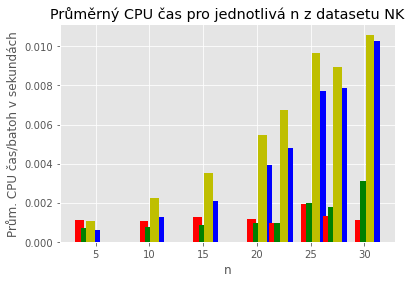

In [9]:
# graf pro porovnani prumerneho cpu casu u bnb, greedyRedux, dp, fptas
plt.bar(df_fptas_fin['n']+1, df_fptas_fin['Avg_Cpu_Time'], align='center', color='b')
plt.bar(df_grx_fin['n']-0.5, df_grx_fin['Avg_Cpu_Time'], align='center', color='r')
plt.bar(df_bnb_fin['n'], df_bnb_fin['Avg_Cpu_Time'], align='center', color='g')
plt.bar(df_dp_fin['n']+0.5, df_dp_fin['Avg_Cpu_Time'], align='center', color='y')
plt.title('Průměrný CPU čas pro jednotlivá n z datasetu ' + fn)
plt.xlabel('n')
plt.ylabel('Prům. CPU čas/batoh v sekundách')
plt.show()

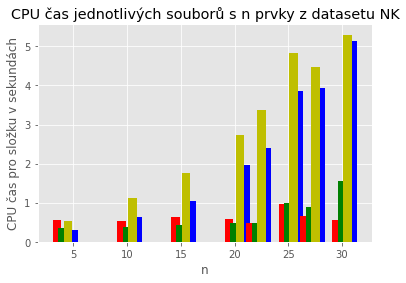

In [10]:
# graf pro porovnani celkoveho cpu casu u bnb, greedyRedux, dp, fptas
plt.bar(df_fptas_fin['n']+1, df_fptas_fin['Total_CPU'], align='center', color='b')
plt.bar(df_grx_fin['n']-0.5, df_grx_fin['Total_CPU'], align='center', color='r')
plt.bar(df_bnb_fin['n'], df_bnb_fin['Total_CPU'], align='center', color='g')
plt.bar(df_dp_fin['n']+0.5, df_dp_fin['Total_CPU'], align='center', color='y')
plt.title('CPU čas jednotlivých souborů s n prvky z datasetu ' + fn)
plt.xlabel('n')
plt.ylabel('CPU čas pro složku v sekundách')
plt.show()

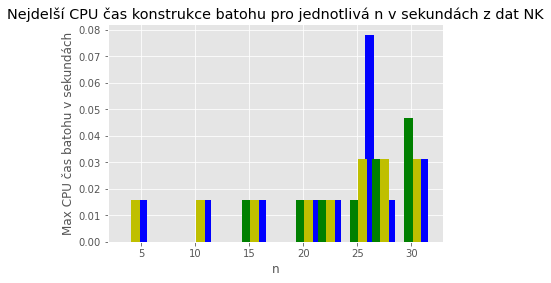

In [11]:
# graf pro porovnani nejdelsiho cpu casu pru jednotliva n u bnb, greedyRedux, dp, fptas
plt.bar(df_fptas_fin['n']+1.1, df_fptas_fin['Max_Cpu'], align='center', color='b')
plt.bar(df_bnb_fin['n']-0.25, df_bnb_fin['Max_Cpu'], align='center', color='g')
plt.bar(df_dp_fin['n']+0.5, df_dp_fin['Max_Cpu'], align='center', color='y')
plt.title('Nejdelší CPU čas konstrukce batohu pro jednotlivá n v sekundách z dat ' + fn)
plt.xlabel('n')
plt.ylabel('Max CPU čas batohu v sekundách')
plt.show()

### Grafy pro BruteForce algo

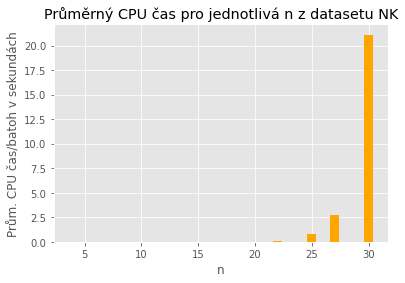

In [12]:
plt.bar(df_bf_fin['n'], df_bf_fin['Avg_Cpu_Time'], align='center', color='orange')
# plt.bar(df_bnb_fin['n'], df_bnb_fin['Avg_Cpu_Time'], align='center', color='g')
# plt.bar(df_dp_fin['n']+0.75, df_dp_fin['Avg_Cpu_Time'], align='center', color='y')
plt.title('Průměrný CPU čas pro jednotlivá n z datasetu ' + fn)
plt.xlabel('n')
plt.ylabel('Prům. CPU čas/batoh v sekundách')
plt.show()

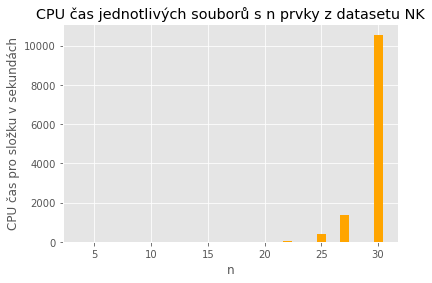

In [13]:
plt.bar(df_bf_fin['n'], df_bf_fin['Total_CPU'], align='center', color='orange')
# plt.bar(df_bnb_fin['n'], df_bnb_fin['Total_CPU'], align='center', color='g')
# plt.bar(df_dp_fin['n']+0.75, df_dp_fin['Total_CPU'], align='center', color='y')
plt.title('CPU čas jednotlivých souborů s n prvky z datasetu ' + fn)
plt.xlabel('n')
plt.ylabel('CPU čas pro složku v sekundách')
plt.show()

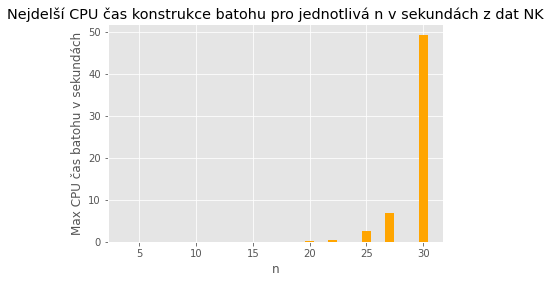

In [14]:
plt.bar(df_bf_fin['n'], df_bf_fin['Max_Cpu'], align='center', color='orange')
# plt.bar(df_bnb_fin['n'], df_bnb_fin['Max_Cpu'], align='center', color='g')
# plt.bar(df_dp_fin['n']+0.75, df_dp_fin['Max_Cpu'], align='center', color='y')
plt.title('Nejdelší CPU čas konstrukce batohu pro jednotlivá n v sekundách z dat ' + fn)
plt.xlabel('n')
plt.ylabel('Max CPU čas batohu v sekundách')
plt.show()